In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys

### __Задача 1__

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

##### __1.1. Скачать данные в закрепе к уроку (данные по недвижимости)__

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### __1.2 Изучите стоимости недвижимости__

In [13]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

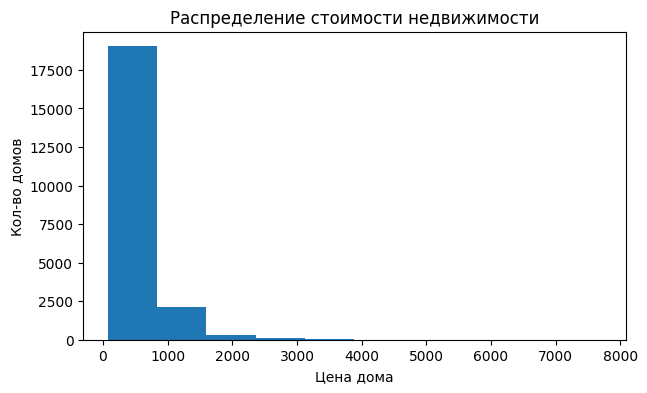

In [16]:
plt.figure(figsize=(7, 4))
plt.hist(df['price']/1000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена дома')
plt.ylabel('Кол-во домов');

##### Вывод:
Наибольшее количество домов, примерно 88% от общего количества, а именно около 19 100 домов из ориентировочно 21 600 имеет стоимость до 850 тыс. Когда цена повышается, резко падает количество представленных объектов. К примеру стоимость в пределах от 850 тыс. до 1 млн 500 тыс. имеют около 11% объектов что составляет 2300 домов из 21 600, а стоимость более 2 млн 300 тыс. имеет около 1% домов.

#####  __1.3 Изучите распределение квадратуры жилой__

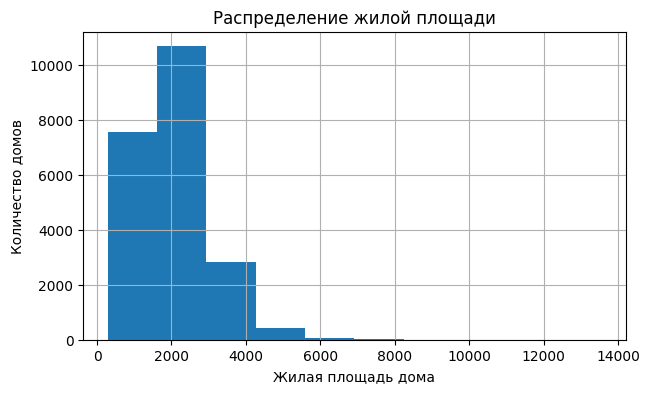

In [15]:
plt.figure(figsize=(7, 4))
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь дома')
plt.ylabel('Количество домов')
plt.grid(True);

##### Какие вывод можно сделать на этот раз:
1. Наибольшее число домов, а именно 10 500 домов от общего количества - это дома с жилой площадью от 1 900 тыс. до 3 000 тыс. 
2. На втором месте , около 7 800 домов - дома с жилой площадью до 2 000 тыс. примерно 2 800 домов, имеют жилую площадь от 3 000 тыс. до 4 100 
3. Доля домов с жилой площадью более 4 100 - не значительна.

##### __2.1.4 Изучите распределение года постройки__

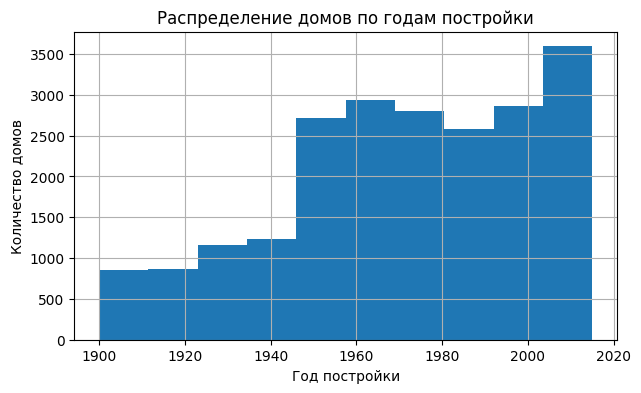

In [17]:
plt.figure(figsize=(7, 4))
plt.hist(df['yr_built'])
plt.title('Распределение домов по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.grid(True);

##### Вывод:
В большинстве своём представлены дома от 1980 до 2015 года постройки. Значительную долю такеж занимают дома с годом постройки от 1950 до 1980 года. Дома от 1900 до 1950 года постройки представлены в меньшей степени.

### __Задача 2__

##### __2.1 Изучите распределение домов от наличия вида на набережную__
##### Постройте график  
##### Сделайте выводы

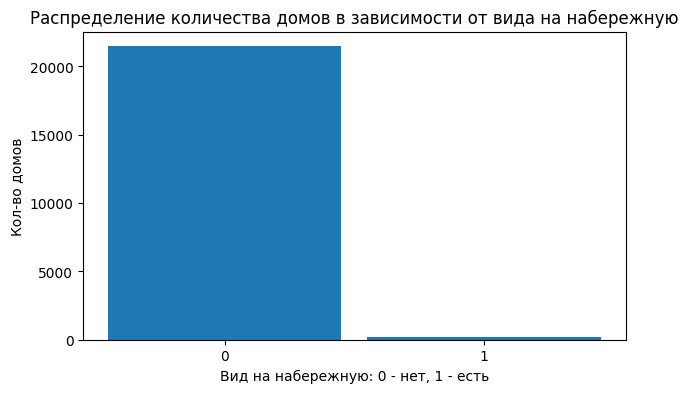

In [18]:
plt.figure(figsize=(7, 4))
df['waterfront_1'] = df['waterfront'].apply(lambda x: str(x))
plt.hist(df['waterfront_1'], bins = range(df['waterfront_1'].nunique()+1), rwidth=0.9, align = 'left')
plt.title('Распределение количества домов в зависимости от вида на набережную')
plt.xlabel('Вид на набережную: 0 - нет, 1 - есть')
plt.ylabel('Кол-во домов');

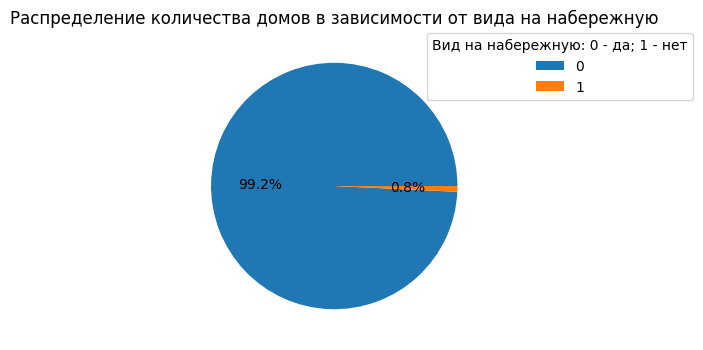

In [27]:
df_w = df['waterfront'].value_counts()
plt.figure(figsize=(7, 4))
plt.title('Распределение количества домов в зависимости от вида на набережную')
plt.pie(df_w.values, autopct = '%.1f%%')
plt.legend(df_w.index, title = "Вид на набережную: 0 - да; 1 - нет", loc=(0.8, 0.78));

##### Вывод:
У большинства домов вида набережную нет, а именно - 99,2 %.

Домов с видом на набережную катастрофически мало - 0,8%.

#####  __2.2 Изучите распределение этажей домов__

In [28]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

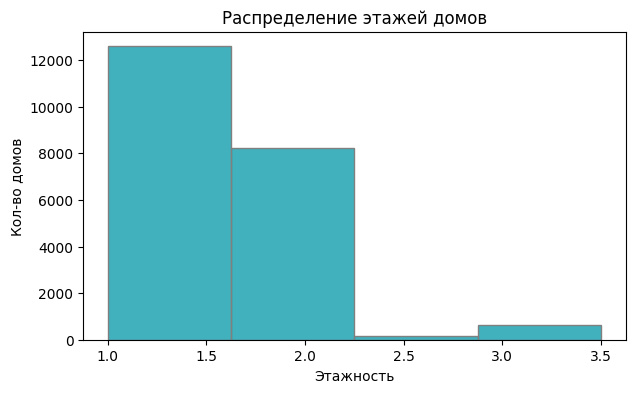

In [29]:
plt.figure(figsize=(7, 4))
sns.histplot(x = df['floors'], bins = 4, color='#0097A7', edgecolor ='gray');
plt.xlabel('Этажность')
plt.ylabel('Количество домов')
plt.title('Распределение этажей домов');


##### __Вывод:__
- Наибольшая доля приходится на одноэтажные дома - 49,4% , а именно 10 680
- 2 этажа имеет 38,1% процент домов, а это 8 241 дом
- и далее по схеме

##### __2.2 Изучите распределение состояния домов__

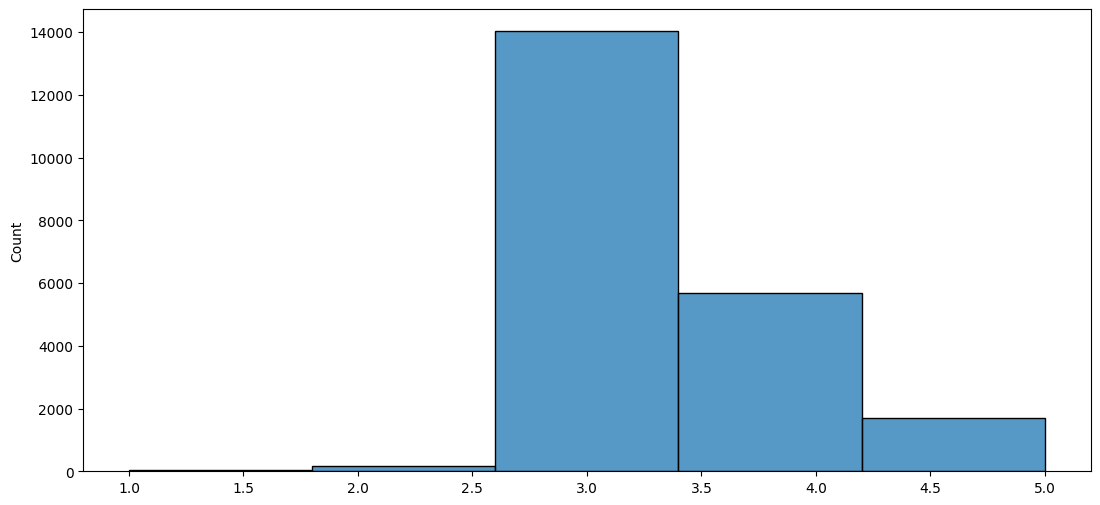

In [33]:
plt.figure(figsize=(13,6))
sns.histplot(df['condition'], bins = 5)
plt.xlabel('');

### __Задача 3__
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

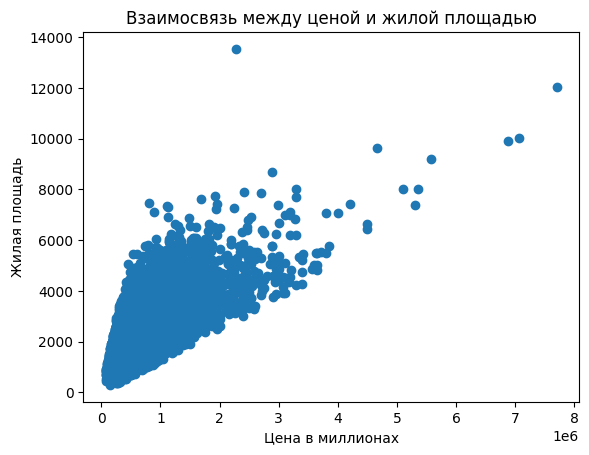

In [37]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylabel('Жилая площадь')
plt.show()

Можно увидеть, что большинство домов находятся в пределах 2.5 миллионов и до 5.000 квадратных метров. Видны выбросы, например один из домов за 2.5 миллиона имеет площадь около 14.000 квадратных метров, или же например один из домов с 12.000 квадратными метрами имеет цену в 7.7 миллионов.

В общем и целом наблюдается достаточно устойчивая кореляция между площадью и ценой

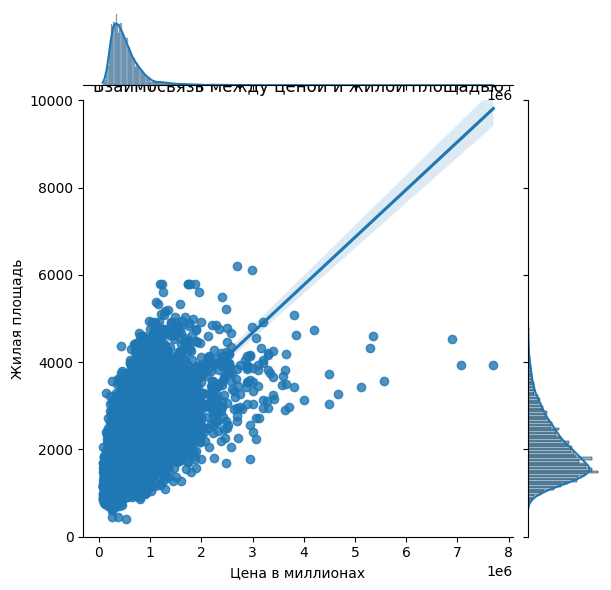

In [38]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

На joinplot можно увидеть, что чем выше жилая площадь, тем выше цена. В основном дома имеют площадь до 5.000 кв.м и до 2.5 миллионов цены.

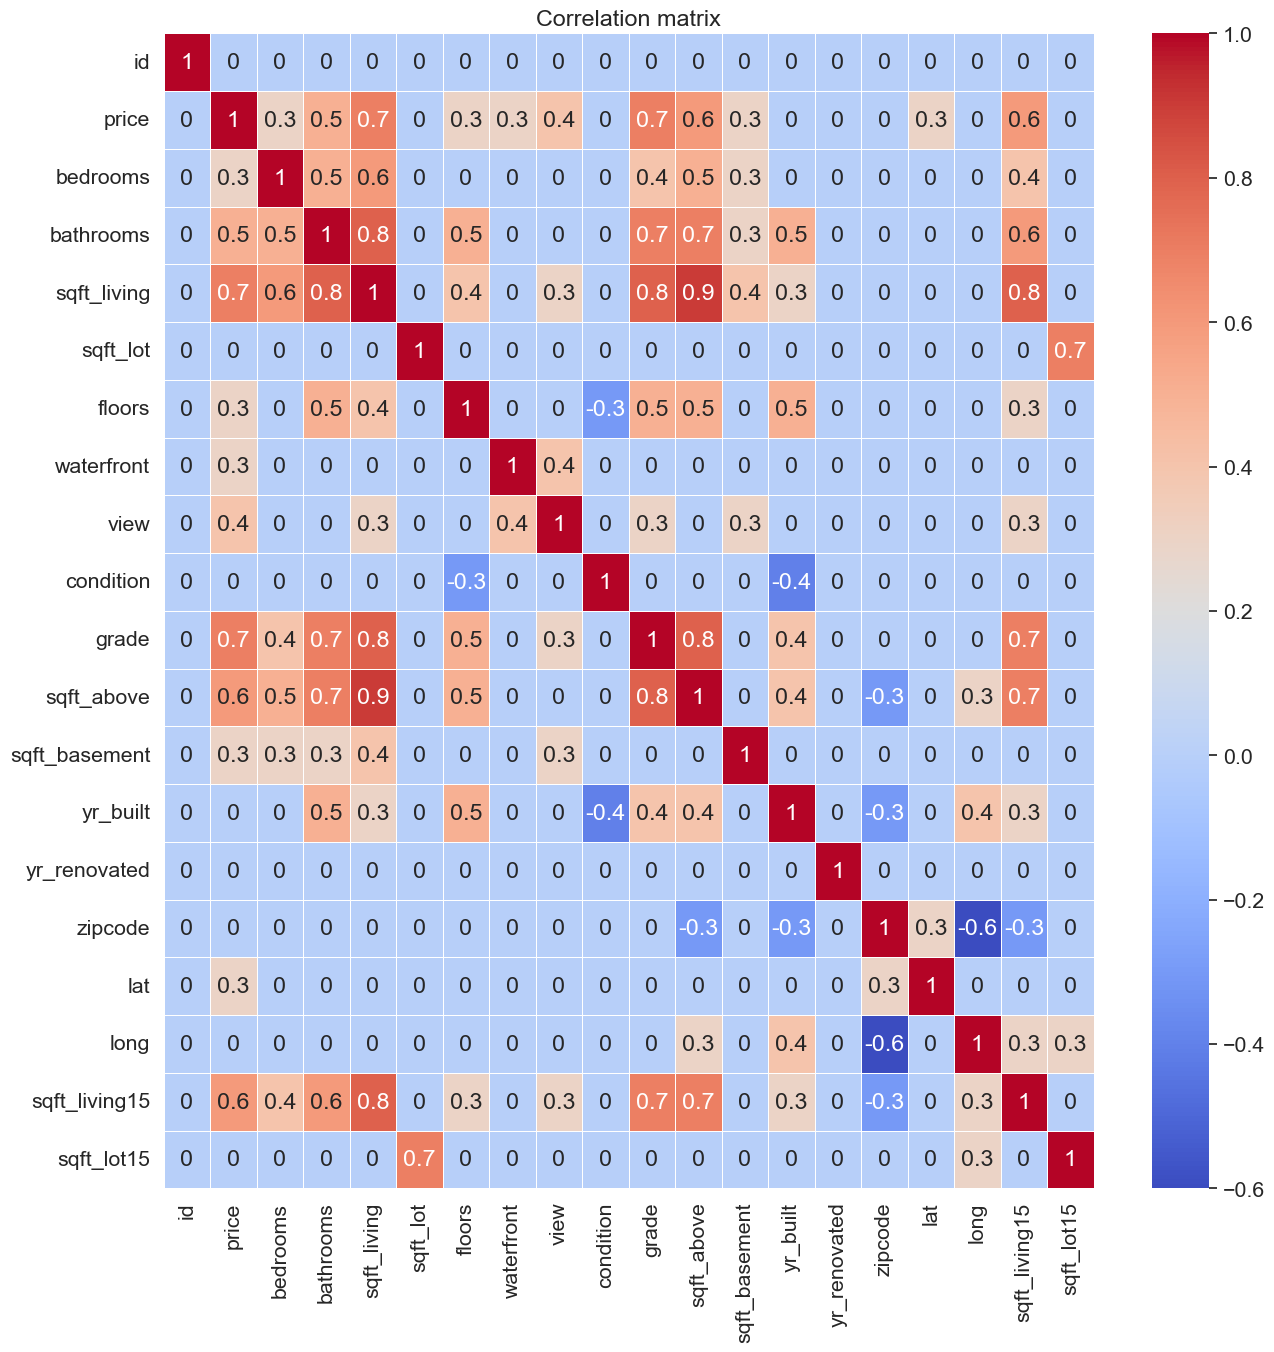

In [40]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');


По heatmap мы можем определить, по каким признакам имеется взаимосвязь у цены.

- batrooms - 0.5
- sqft_living - 0.7
- grade - 0.7
- sqft_above - 0.6
- sqft_living15 -0.6


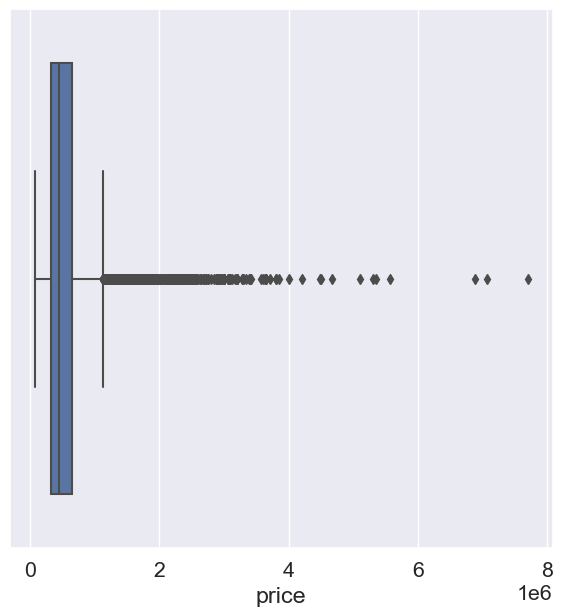

In [46]:
plt.figure(figsize=(7, 7))
sns.boxplot(x=df['price'], whis=1.5);


Большая часть домов имеет цену в диапазоне 500 000 - 700 000 тысяч, но также и имеются выбросы с большим разбросом по цене.

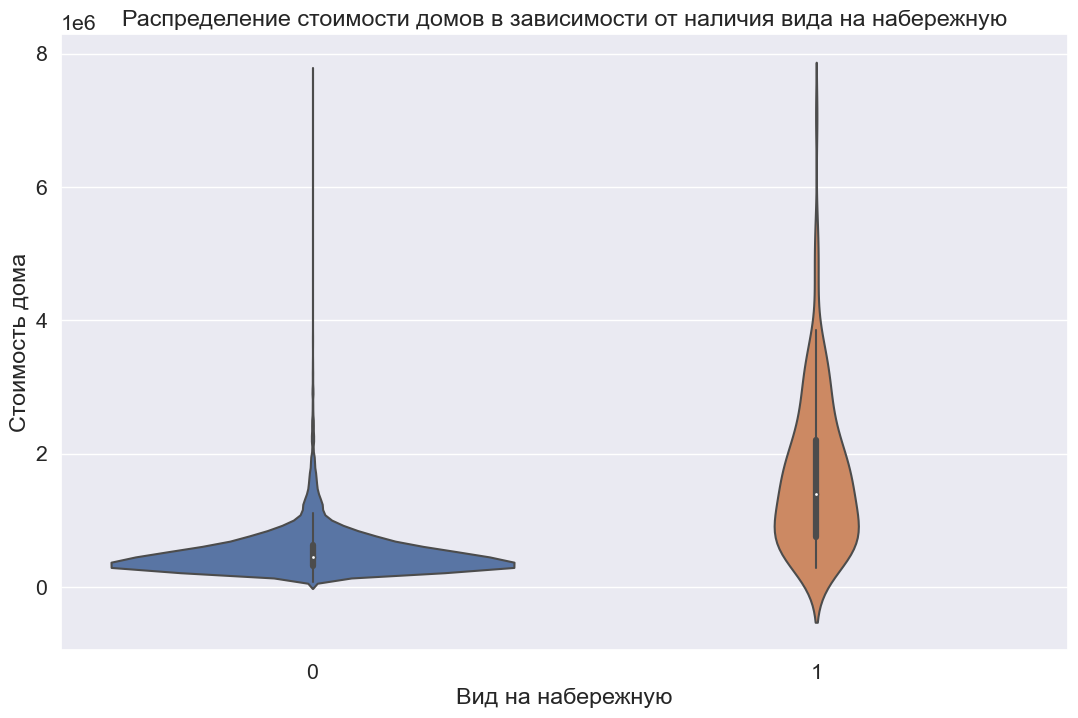

In [45]:
plt.figure(figsize=(13, 8))
sns.violinplot(data = df, x = 'waterfront', y = 'price')
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость дома')
plt.title('Распределение стоимости домов в зависимости от наличия вида на набережную');

##### __Выводы__

- Важно отметить, что рассматриваемая нами территория находится на побережье и уходит вглубь материика, и 99.2% всех домов без вида на набережную и стоимость таких домов редко, но все же превышает 250 000 долларов
- Также хотелось бы отметить дома с видом на набережную - их стоимость распределена равномерно и находится в пределах до 600 000